<a href="https://colab.research.google.com/github/joudelshawa/mental-health-ai-app/blob/feature%2Fdata_preprocessing/name_entity_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# from towardsdatascience article:
https://towardsdatascience.com/named-entity-recognition-with-nltk-and-spacy-8c4a7d88e7da

In [4]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

In [7]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [12]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

Then we apply word tokenization and part-of-speech tagging to the sentence.



In [13]:
def preprocess(sent):
    sent = nltk.word_tokenize(sent)
    sent = nltk.pos_tag(sent)
    return sent

trying it out:

In [14]:
ex = 'European authorities fined Google a record $5.1 billion on Wednesday for abusing \
 its power in the mobile phone market and ordered the company to alter its practices'
sent = preprocess(ex)
sent

[('European', 'JJ'),
 ('authorities', 'NNS'),
 ('fined', 'VBD'),
 ('Google', 'NNP'),
 ('a', 'DT'),
 ('record', 'NN'),
 ('$', '$'),
 ('5.1', 'CD'),
 ('billion', 'CD'),
 ('on', 'IN'),
 ('Wednesday', 'NNP'),
 ('for', 'IN'),
 ('abusing', 'VBG'),
 ('its', 'PRP$'),
 ('power', 'NN'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('mobile', 'JJ'),
 ('phone', 'NN'),
 ('market', 'NN'),
 ('and', 'CC'),
 ('ordered', 'VBD'),
 ('the', 'DT'),
 ('company', 'NN'),
 ('to', 'TO'),
 ('alter', 'VB'),
 ('its', 'PRP$'),
 ('practices', 'NNS')]

Now we’ll implement noun phrase chunking to identify named entities using a regular expression consisting of rules that indicate how sentences should be chunked.

Our chunk pattern consists of one rule, that a noun phrase, NP, should be formed whenever the chunker finds an optional determiner, DT, followed by any number of adjectives, JJ, and then a noun, NN.

In [16]:
pattern = 'NP: {<DT>?<JJ>*<NN>}'


**Chunking**

Using this pattern, we create a chunk parser and test it on our sentence.

The basic technique we will use for entity detection is chunking, which segments and labels multi-token sequences.

In [17]:
cp = nltk.RegexpParser(pattern)
cs = cp.parse(sent)
print(cs)

(S
  European/JJ
  authorities/NNS
  fined/VBD
  Google/NNP
  (NP a/DT record/NN)
  $/$
  5.1/CD
  billion/CD
  on/IN
  Wednesday/NNP
  for/IN
  abusing/VBG
  its/PRP$
  (NP power/NN)
  in/IN
  (NP the/DT mobile/JJ phone/NN)
  (NP market/NN)
  and/CC
  ordered/VBD
  (NP the/DT company/NN)
  to/TO
  alter/VB
  its/PRP$
  practices/NNS)


IOB tags have become the standard way to represent chunk structures in files, and we will also be using this format.

In [21]:
from nltk.chunk import conlltags2tree, tree2conlltags
from pprint import pprint
iob_tagged = tree2conlltags(cs)
pprint(iob_tagged)

[('European', 'JJ', 'O'),
 ('authorities', 'NNS', 'O'),
 ('fined', 'VBD', 'O'),
 ('Google', 'NNP', 'O'),
 ('a', 'DT', 'B-NP'),
 ('record', 'NN', 'I-NP'),
 ('$', '$', 'O'),
 ('5.1', 'CD', 'O'),
 ('billion', 'CD', 'O'),
 ('on', 'IN', 'O'),
 ('Wednesday', 'NNP', 'O'),
 ('for', 'IN', 'O'),
 ('abusing', 'VBG', 'O'),
 ('its', 'PRP$', 'O'),
 ('power', 'NN', 'B-NP'),
 ('in', 'IN', 'O'),
 ('the', 'DT', 'B-NP'),
 ('mobile', 'JJ', 'I-NP'),
 ('phone', 'NN', 'I-NP'),
 ('market', 'NN', 'B-NP'),
 ('and', 'CC', 'O'),
 ('ordered', 'VBD', 'O'),
 ('the', 'DT', 'B-NP'),
 ('company', 'NN', 'I-NP'),
 ('to', 'TO', 'O'),
 ('alter', 'VB', 'O'),
 ('its', 'PRP$', 'O'),
 ('practices', 'NNS', 'O')]


In this representation, there is one token per line, each with its part-of-speech tag and its named entity tag. 

**With the function nltk.ne_chunk(), we can recognize named entities using a classifier, the classifier adds category labels such as PERSON, ORGANIZATION, and GPE.**

In [23]:
# bc next cell wouldnt work
# nltk for NER-tagging
import nltk
from nltk.corpus import conll2000
from nltk.chunk import conlltags2tree, tree2conlltags
from nltk.chunk import ne_chunk
from nltk import pos_tag

In [24]:
ne_tree = ne_chunk(pos_tag(word_tokenize(ex)))
print(ne_tree)

(S
  (GPE European/JJ)
  authorities/NNS
  fined/VBD
  (PERSON Google/NNP)
  a/DT
  record/NN
  $/$
  5.1/CD
  billion/CD
  on/IN
  Wednesday/NNP
  for/IN
  abusing/VBG
  its/PRP$
  power/NN
  in/IN
  the/DT
  mobile/JJ
  phone/NN
  market/NN
  and/CC
  ordered/VBD
  the/DT
  company/NN
  to/TO
  alter/VB
  its/PRP$
  practices/NNS)


hmm defines Google as a person, so that's wrong

**SpaCy**

SpaCy’s named entity recognition has been trained on the OntoNotes 5 corpus and it supports the following entity types: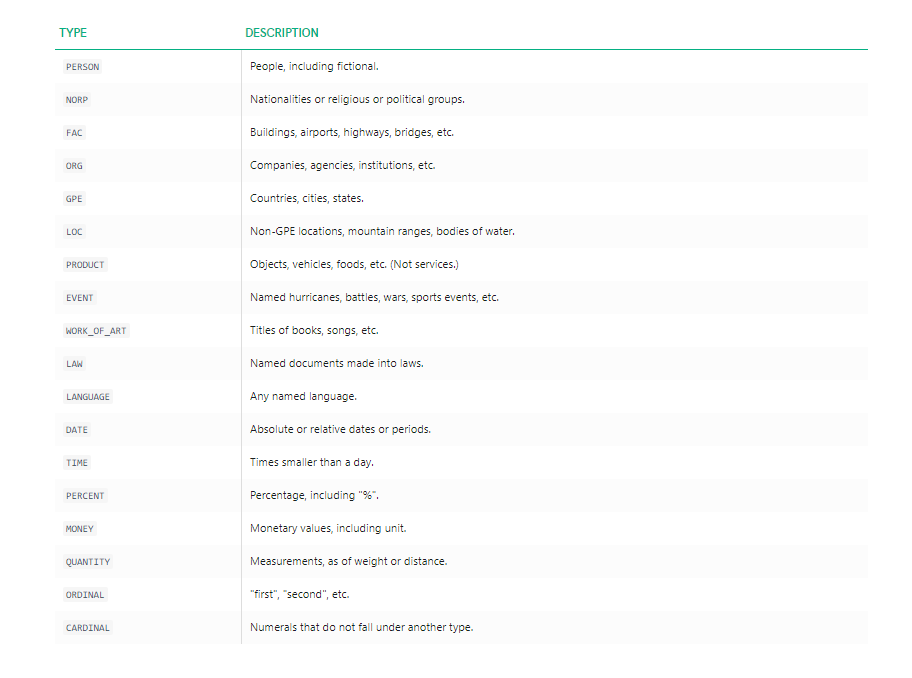

In [25]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

One of the nice things about Spacy is that we only need to apply nlp once, the entire background pipeline will return the objects.

In [26]:
doc = nlp('European authorities fined Google a record $5.1 billion on Wednesday for abusing its power in the mobile phone market and ordered the company to alter its practices')
pprint([(X.text, X.label_) for X in doc.ents])

[('European', 'NORP'),
 ('Google', 'ORG'),
 ('$5.1 billion', 'MONEY'),
 ('Wednesday', 'DATE')]


European is NORD (nationalities or religious or political groups), Google is an organization, $5.1 billion is monetary value and Wednesday is a date object. They are all correct.

During the above example, we were working on entity level, in the following example, we are demonstrating token-level entity annotation using the BILUO tagging scheme to describe the entity boundaries.
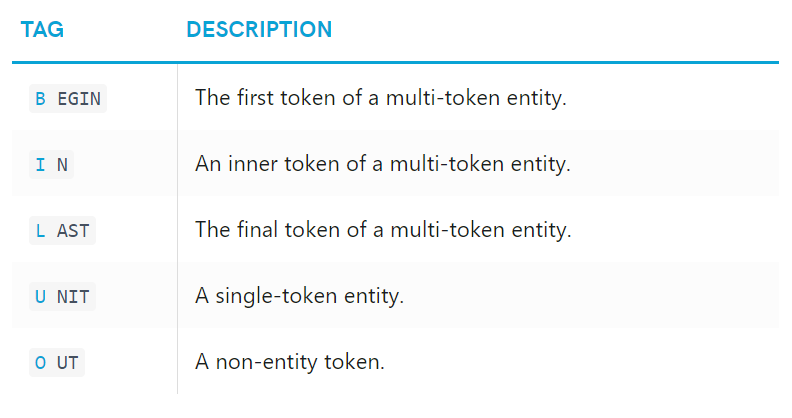

In [27]:
pprint([(X, X.ent_iob_, X.ent_type_) for X in doc])

[(European, 'B', 'NORP'),
 (authorities, 'O', ''),
 (fined, 'O', ''),
 (Google, 'B', 'ORG'),
 (a, 'O', ''),
 (record, 'O', ''),
 ($, 'B', 'MONEY'),
 (5.1, 'I', 'MONEY'),
 (billion, 'I', 'MONEY'),
 (on, 'O', ''),
 (Wednesday, 'B', 'DATE'),
 (for, 'O', ''),
 (abusing, 'O', ''),
 (its, 'O', ''),
 (power, 'O', ''),
 (in, 'O', ''),
 (the, 'O', ''),
 (mobile, 'O', ''),
 (phone, 'O', ''),
 (market, 'O', ''),
 (and, 'O', ''),
 (ordered, 'O', ''),
 (the, 'O', ''),
 (company, 'O', ''),
 (to, 'O', ''),
 (alter, 'O', ''),
 (its, 'O', ''),
 (practices, 'O', '')]


"B" means the token begins an entity, "I" means it is inside an entity, "O" means it is outside an entity, and "" means no entity tag is set.

**Extracting named entity from an article**

Now let’s get serious with SpaCy and extracting named entities from a New York Times article

In [30]:
from bs4 import BeautifulSoup
import requests
import re
def url_to_string(url):
    res = requests.get(url)
    html = res.text
    soup = BeautifulSoup(html, 'html5lib')
    for script in soup(["script", "style", 'aside']):
        script.extract()
    return " ".join(re.split(r'[\n\t]+', soup.get_text()))
    
ny_bb = url_to_string('https://www.nytimes.com/2018/08/13/us/politics/peter-strzok-fired-fbi.html?hp&action=click&pgtype=Homepage&clickSource=story-heading&module=first-column-region&region=top-news&WT.nav=top-news')
article = nlp(ny_bb)
len(article.ents)

154

In [31]:
labels = [x.label_ for x in article.ents]
Counter(labels)

Counter({'CARDINAL': 3,
         'DATE': 23,
         'GPE': 9,
         'LOC': 1,
         'NORP': 2,
         'ORDINAL': 1,
         'ORG': 38,
         'PERSON': 77})

The following are three most frequent tokens.

In [40]:
items = [x.text for x in article.ents]
Counter(items).most_common(3)

[('Strzok', 29), ('F.B.I.', 19), ('Trump', 13)]

Let’s randomly select one sentence to learn more.

In [41]:
sentences = [x for x in article.sents]
print(sentences[21])

Firing Mr. Strzok, however, removes a favorite target of Mr. Trump from the ranks of the F.B.I. and gives Mr. Bowdich and the F.B.I. director, Christopher A. Wray, a chance to move beyond the president’s ire.


Let’s run displacy.render to generate the raw markup.

In [42]:
displacy.render(nlp(str(sentences[21])), jupyter=True, style='ent')

Using spaCy’s built-in displaCy visualizer, here’s what the above sentence and its dependencies look like:

In [43]:
displacy.render(nlp(str(sentences[21])), style='dep', jupyter = True, options = {'distance': 120})

Next, we verbatim, extract part-of-speech and lemmatize this sentence.

In [45]:
[(x.orth_,x.pos_, x.lemma_) for x in [y 
                                      for y
                                      in nlp(str(sentences[21])) 
                                      if not y.is_stop and y.pos_ != 'PUNCT']]

[('Firing', 'VERB', 'fire'),
 ('Mr.', 'PROPN', 'Mr.'),
 ('Strzok', 'PROPN', 'Strzok'),
 ('removes', 'VERB', 'remove'),
 ('favorite', 'ADJ', 'favorite'),
 ('target', 'NOUN', 'target'),
 ('Mr.', 'PROPN', 'Mr.'),
 ('Trump', 'PROPN', 'Trump'),
 ('ranks', 'NOUN', 'rank'),
 ('F.B.I.', 'PROPN', 'F.B.I.'),
 ('gives', 'VERB', 'give'),
 ('Mr.', 'PROPN', 'Mr.'),
 ('Bowdich', 'PROPN', 'Bowdich'),
 ('F.B.I.', 'PROPN', 'F.B.I.'),
 ('director', 'NOUN', 'director'),
 ('Christopher', 'PROPN', 'Christopher'),
 ('A.', 'PROPN', 'A.'),
 ('Wray', 'PROPN', 'Wray'),
 ('chance', 'NOUN', 'chance'),
 ('president', 'NOUN', 'president'),
 ('ire', 'PROPN', 'ire')]

In [48]:
dict([(str(x), x.label_) for x in nlp(str(sentences[21])).ents])

{'Bowdich': 'PERSON',
 'Christopher A. Wray': 'PERSON',
 'F.B.I.': 'ORG',
 'Strzok': 'PERSON',
 'Trump': 'PERSON'}

In [51]:
print([(x, x.ent_iob_, x.ent_type_) for x in sentences[21]])

[(Firing, 'O', ''), (Mr., 'O', ''), (Strzok, 'B', 'PERSON'), (,, 'O', ''), (however, 'O', ''), (,, 'O', ''), (removes, 'O', ''), (a, 'O', ''), (favorite, 'O', ''), (target, 'O', ''), (of, 'O', ''), (Mr., 'O', ''), (Trump, 'B', 'PERSON'), (from, 'O', ''), (the, 'O', ''), (ranks, 'O', ''), (of, 'O', ''), (the, 'O', ''), (F.B.I., 'B', 'ORG'), (and, 'O', ''), (gives, 'O', ''), (Mr., 'O', ''), (Bowdich, 'B', 'PERSON'), (and, 'O', ''), (the, 'O', ''), (F.B.I., 'B', 'ORG'), (director, 'O', ''), (,, 'O', ''), (Christopher, 'B', 'PERSON'), (A., 'I', 'PERSON'), (Wray, 'I', 'PERSON'), (,, 'O', ''), (a, 'O', ''), (chance, 'O', ''), (to, 'O', ''), (move, 'O', ''), (beyond, 'O', ''), (the, 'O', ''), (president, 'O', ''), (’s, 'O', ''), (ire, 'O', ''), (., 'O', '')]


Finally, we visualize the entity of the entire article.


In [53]:
displacy.render(article, jupyter=True, style='ent')

[another article:](https://wellsr.com/python/python-named-entity-recognition-with-nltk-and-spacy/) says spacy is better and more accurate so we should prob go w that instead of nltk

In [54]:
import spacy
import en_core_web_sm
spacy_model = en_core_web_sm.load()

sentence = """Born and raised in Madeira, Ronaldo began his senior club career playing for Sporting CP,
before signing with Manchester United in 2003, aged 18. After winning the FA Cup in his first season,
he helped United win three successive Premier League titles, the UEFA Champions League, and the FIFA Club World Cup"""

entity_doc = spacy_model(sentence)
entity_doc.ents

print([(entity.text, entity .label_) for entity in entity_doc.ents])

[('Ronaldo', 'PERSON'), ('Sporting CP', 'ORG'), ('Manchester United', 'PERSON'), ('2003', 'DATE'), ('18', 'DATE'), ('the FA Cup', 'EVENT'), ('his first season', 'DATE'), ('United', 'ORG'), ('three', 'CARDINAL'), ('Premier League', 'ORG'), ('the UEFA Champions League', 'ORG'), ('the FIFA Club World Cup', 'ORG')]


In [68]:
displacy.render(entity_doc, jupyter=True, style='ent')

#**TLDR:** for named entity recognition, we should use spaCy instead of NLTK

*note that neither is 100% accurate but they're good enough to be used

also note that if ur unsure about what a label means, u can use 

```
spacy.explain('label')
```



In [57]:
spacy.explain('GPE')

'Countries, cities, states'

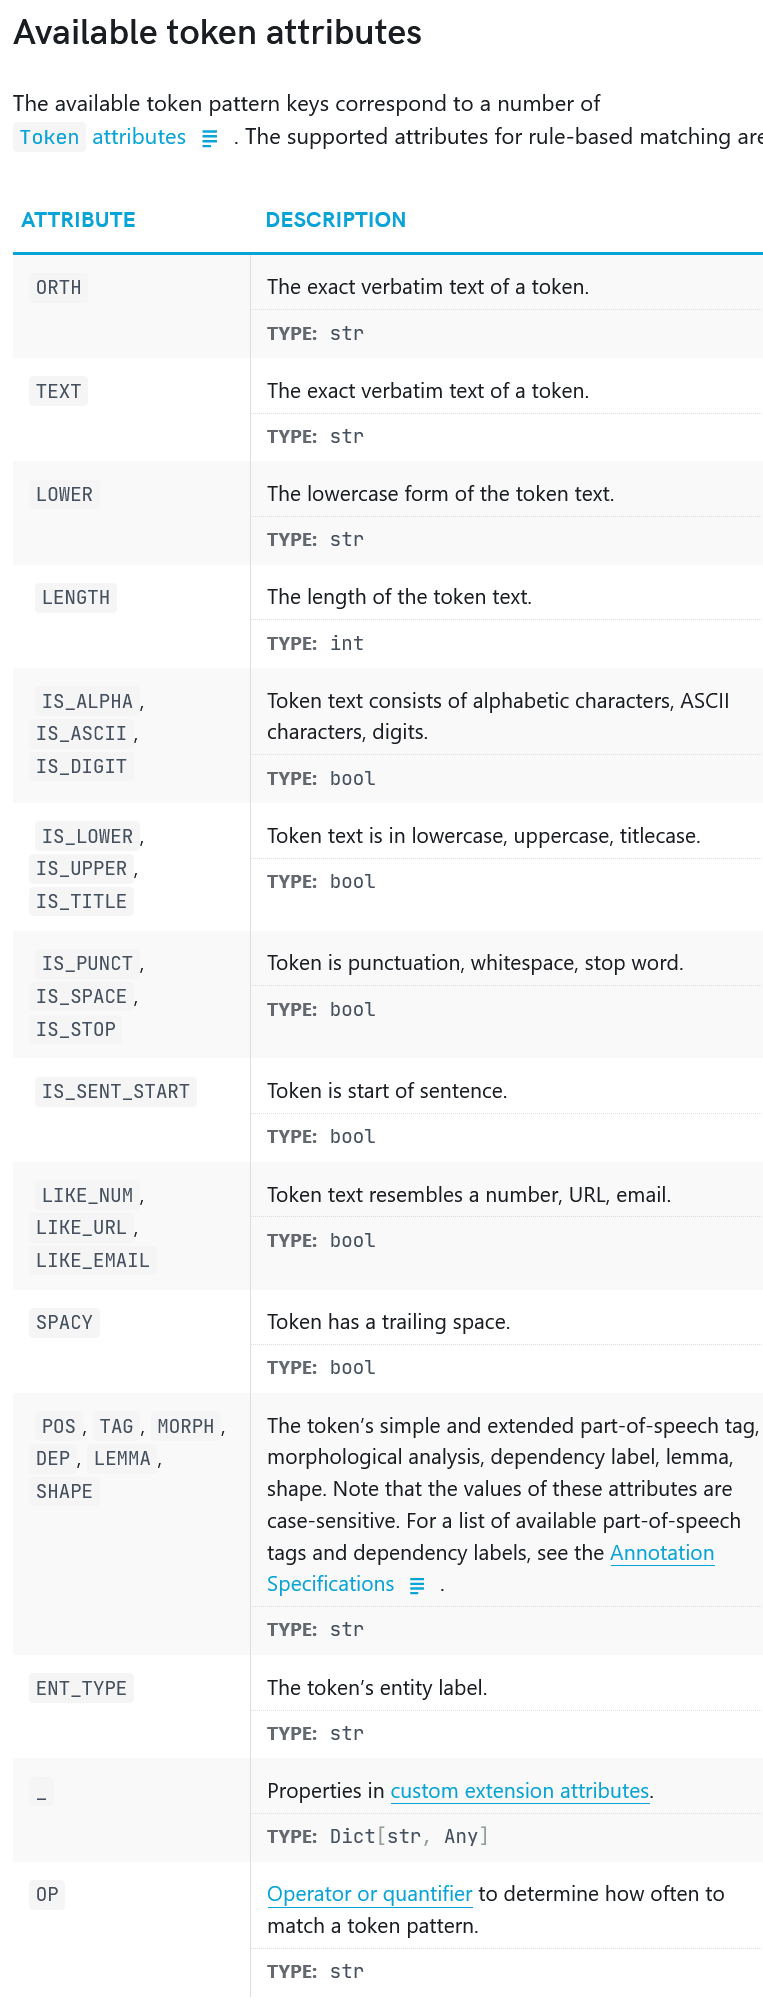

something the spaCy website mentioned about social media: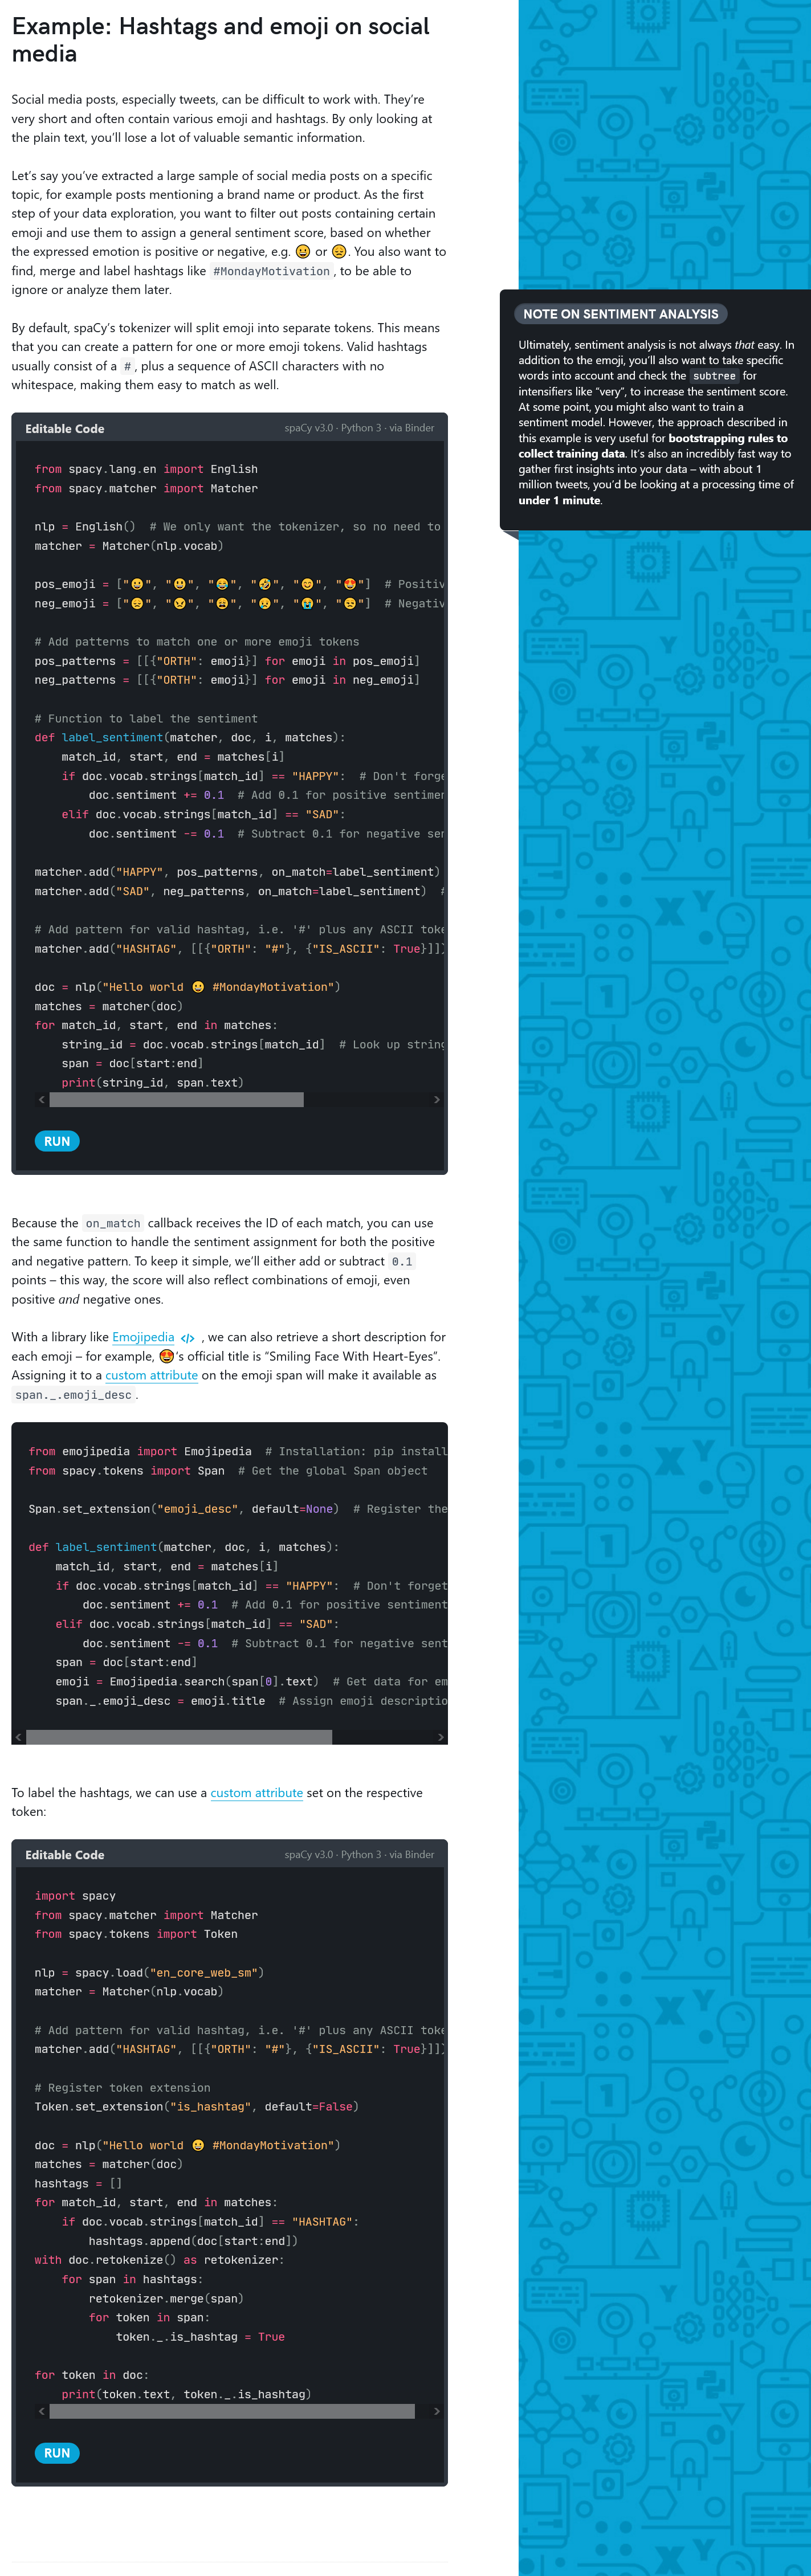

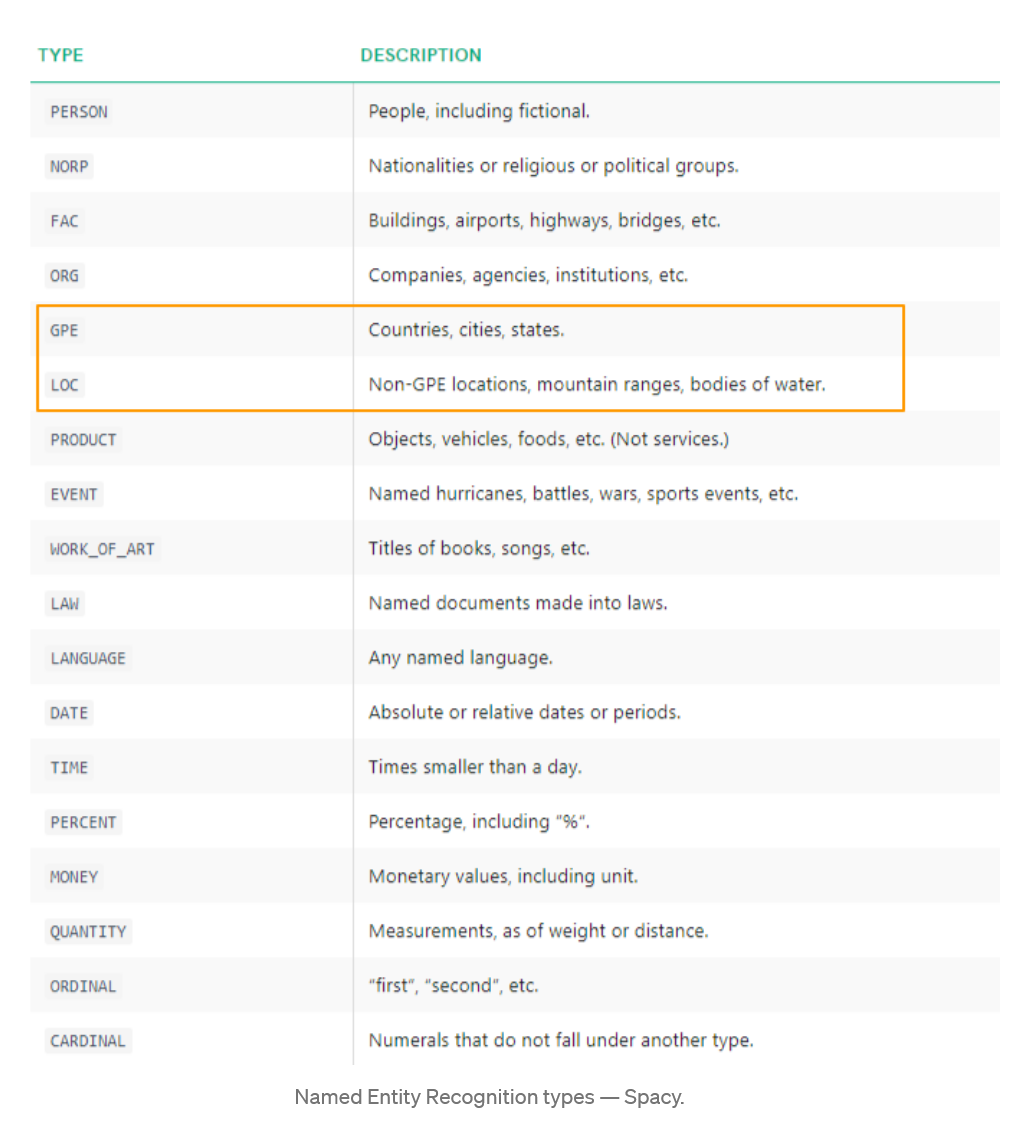

Let us see a simple example of using Spacy to extract location data from a news article.


In [62]:
import spacy
from spacy import displacy 

In [70]:
nlp = spacy.load('en_core_web_sm')# Text with nlp
doc = nlp(" Multiple tornado warnings were issued for parts of New York on Sunday night.The first warning, which expired at 9 p.m., covered the Bronx, Yonkers and New Rochelle. More than 2 million people live in the impacted area.")# Display Entities
displacy.render(doc, jupyter=True, style="ent")

The output is an annotated text where SpaCy highlights Entities. Here we see it extracted New York, Bronx, Yonkers, and New Rochelle as GPE.